## LEAD SCORING CASE STUDY BY TUSHAR JOSHI & APOORVA BHATLA.

**PROBLEM STATEMENT**

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
# Importing neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.options.display.max_columns=200
pd.options.display.max_rows=200

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Step 1 : Date Reading & Inspection

In [4]:
## Step 1 : Date Reading & Inspection
ls=pd.read_csv("Leads.csv")
ls.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#checking the shape of dataframe

ls.shape

(9240, 37)

In [6]:
#Describing data to get statistical information of the dataset
ls.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Columns like **TotalVisits, Total Time Spent on Website, Page Views Per Visit** have **outliers**, We will be addressing them while treating the outliers.

In [7]:
# Checking the overall info of the dataset.
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###### There are 7 numerical and 30 categorical columns.

In [8]:
# checking the data types f all columns.
ls.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [9]:
# Checking for percentage of missing values in the dataset

round(ls.isnull().sum()*100/len(ls),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There are significant number of columns with missing values, which we will be handling in Data cleaning step.

## Step 2 : Date Cleaning and Pre-processing

In [10]:
# inspecting the dataset once again.

ls.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


On checking the dataset, it seems there are some columns/categorical variables having label as '**Select**' which means no option was selected when they user was filling the form, so '**Select**' is like a **NaN** value in the dataset. 

Replacing this Select with null to handle such scenarios.

In [11]:
#checking the sum of null values.
ls.isnull().values.sum()

41039

In [12]:
## replacing all the values of "Select" to NaN (null) te dataset.
ls=ls.replace("Select", np.nan)

In [13]:
#Again checking the sum of null values after replacing "Select" to null
ls.isnull().values.sum()

54419

In [14]:
#Checking the head of dataset to confirm "Select" is now null
ls.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


####  As we see from the data set "Select" word has been replaced with "NaN" values.

In [15]:
# Checking for missing values in the dataset


round(ls.isnull().sum()*100/len(ls),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

From above it is seen that some columns have more than **30% of missing values** , so we shall decide to drop these columns  as the columns with somany missing values may not serve the purpose of model building.

In [16]:
#Finding and displaying the columns with more than 30% null values

cols_2_drop=ls.columns[ls.isnull().mean()>=.3]
cols_2_drop

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [17]:
#Number of the columns with more than 30% null values

len(cols_2_drop)

10

In [18]:
# Dropping the columns with more than 30% null values

ls=ls.drop(cols_2_drop, axis=1)

In [19]:
#Checking shape of columns post removal of columns
ls.shape


(9240, 27)

In [20]:
#printing the number of unique values in each column

print(ls.nunique(axis=0))


Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

##### Inspecting the Unique values

We see that there are many categorical columns with only one unique values, which are of no use for the model building process as they are highly skewed. So we should be dropping them.

In [21]:
#Identifying columns with only one unique value

unq_1_cols = ls.nunique()[lambda x: x == 1].index
unq_1_cols


Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

In [22]:
#Dropping columns with only one unique value
ls=ls.drop(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],axis=1)


# Categorical Columns Analysis

In [23]:
ls.isnull().sum(axis=0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [24]:
#Checking the sum of null values for "Country" column

ls["Country"].isnull().sum(axis=0)


2461

In [25]:
# checking the unique values in "Country" column

print(ls.Country.value_counts(normalize=True))

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Canada                  0.000590
Kuwait                  0.000590
Nigeria                 0.000590
South Africa            0.000590
Germany                 0.000590
Sweden                  0.000443
Philippines             0.000295
Belgium                 0.000295
Uganda                  0.000295
Ghana                   0.000295
Bangladesh              0.000295
Netherlands             0.000295
Asia/Pacific Region     0.000295
Italy                   0.000295
China                   0.000295
Sri Lanka               0.000148
Denmark                 0.000148
Indonesia 

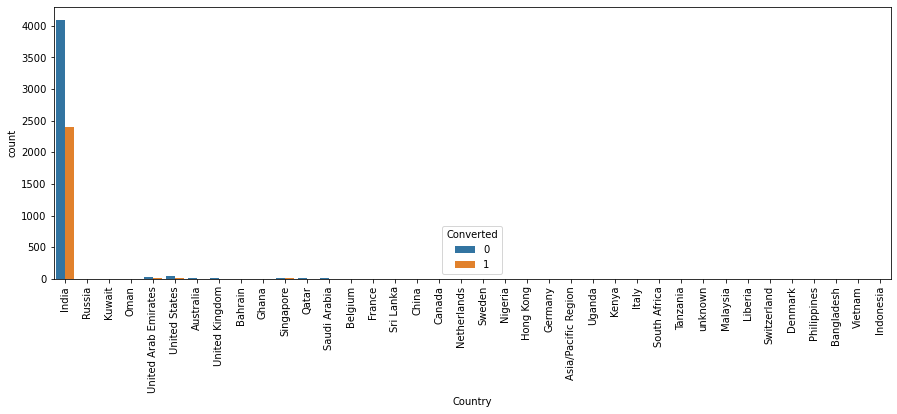

In [26]:
#plotting spread of Country columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(ls.Country, hue=ls.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We see that the country column has most of the values around **95%** as India, Country is a highly skewed column, we can drop them, but we can also group the other countries into variable **"outside India."**

In [27]:
# Grouping the other countries to "Outside India" and checking the unique values

ls['Country'] = ls['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
ls['Country'].value_counts()

India            6492
Outside India    2748
Name: Country, dtype: int64

In [28]:
#Re-checking the sum of null values for the column "Country" again

ls["Country"].isnull().sum(axis=0)

0

In [29]:
#checking the value counts for the column "What is your current occupation"

ls["What is your current occupation"].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

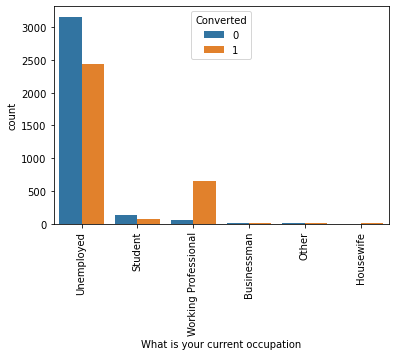

In [30]:
#visualizing count of Variable for the column "What is your current occupation"

s1=sns.countplot(ls['What is your current occupation'], hue=ls.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

  We see that the **Unemployed and Working Professional** are significant in number while other features are very less. So grouping the other features to a new group **Other Professionals**.

In [31]:
#Replacing the values "Students","Other","Housewife" and "Businessman" with "Other Professionals"
ls["What is your current occupation"]=ls["What is your current occupation"].replace(["Student","Other","Housewife","Businessman"], "Other Professions")

In [32]:
#checking the values for the column again, and we see that we have succesfully replaced, 
#the other professionals.

ls["What is your current occupation"].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Other Professions       0.037252
Name: What is your current occupation, dtype: float64

In [33]:
# Inputing the column with "Unknown" for null values
ls['What is your current occupation'].fillna('Unknown', inplace=True)

In [34]:
#checking the sum of null values for the column "What is your current occupation"
ls["What is your current occupation"].isnull().sum(axis=0)

0

In [35]:
# Highly skewed value-to be dropped.

ls['What matters most to you in choosing a course'].value_counts(normalize=True)


Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

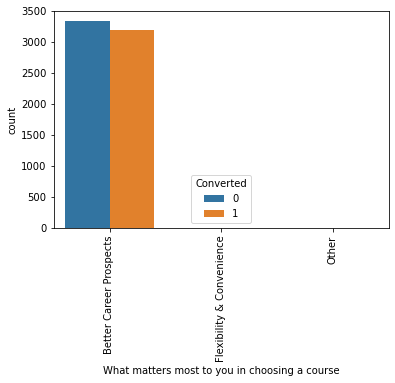

In [36]:
#visualizing count of "What matters most to you in choosing a course" based on Converted value

s1=sns.countplot(ls['What matters most to you in choosing a course'], hue=ls.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inspecting the column we see that **Better Career Prospects** has 99% presence in the column, thus making it a highly skewed column. So, we can drop it.

In [37]:
# dropping the column 'What matters most to you in choosing a course'
ls=ls.drop(['What matters most to you in choosing a course'],axis=1)

In [38]:
#checking the value counts for the column 'Lead Source'

print(ls['Lead Source'].value_counts(normalize=False))

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
testone                 1
NC_EDM                  1
WeLearn                 1
youtubechannel          1
blog                    1
Pay per Click Ads       1
Name: Lead Source, dtype: int64


On checking the value counts it is seen that we have two values by the name of "**google**" and "**Google**". 
So we replace the value **"google" with "Google"**.

In [39]:
#finding the value in 'Lead Source' column "google" and replacing it
ls.loc[ls['Lead Source']=="google",'Lead Source']="Google"

In [40]:
#checking the value counts again
print(ls['Lead Source'].value_counts(normalize=False))

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
testone                 1
NC_EDM                  1
blog                    1
welearnblog_Home        1
Name: Lead Source, dtype: int64


In [41]:
#checking the null values 
(ls['Lead Source'].isnull().sum()/len(ls))*100

0.38961038961038963

In [42]:
# Since the null Values are so less in number, dropping the null values.
ls=ls.dropna(axis=0, subset=["Lead Source"])

In [43]:
#checking the sum of null values again
ls['Lead Source'].isnull().sum()

0

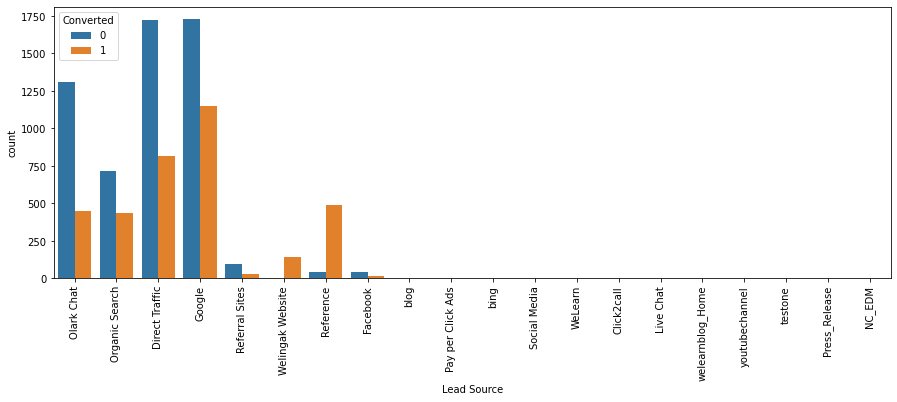

In [44]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(ls['Lead Source'], hue=ls.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inspecting the graph we see that **Google, Olark Chat and Direct Traffic** brings in the  most visitors, followed by *facebook and Refernces*

# Numerical Columns Analysis

In [45]:
#checking the percentage of null values for column "TotalVisits"
(ls['TotalVisits'].isnull().sum()/len(ls))*100

1.4124293785310735

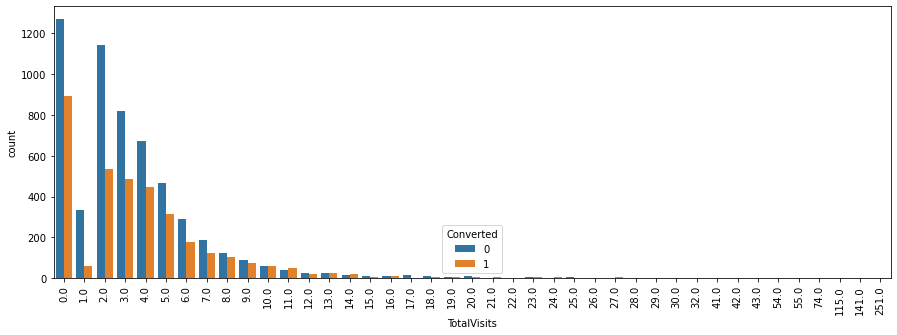

In [46]:
#visualizing count of Variable based on TotalVisits value
plt.figure(figsize=(15,5))
s1=sns.countplot(ls['TotalVisits'], hue=ls.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We see that a lot of visitors that got converted without even visiting the website, and a significant number of visitors were converted who visted between 2-7 times.

In [47]:
# Checking the unique Values
print(ls['TotalVisits'].value_counts(normalize=True))

0.0      0.238153
2.0      0.185034
3.0      0.143928
4.0      0.123430
5.0      0.086291
6.0      0.051356
1.0      0.043531
7.0      0.034053
8.0      0.024686
9.0      0.018074
10.0     0.012563
11.0     0.009478
13.0     0.005290
12.0     0.004959
14.0     0.003967
16.0     0.002314
15.0     0.001984
17.0     0.001763
18.0     0.001653
20.0     0.001322
19.0     0.000992
23.0     0.000661
21.0     0.000661
27.0     0.000551
24.0     0.000551
25.0     0.000551
22.0     0.000331
28.0     0.000220
29.0     0.000220
26.0     0.000220
251.0    0.000110
74.0     0.000110
30.0     0.000110
141.0    0.000110
54.0     0.000110
41.0     0.000110
115.0    0.000110
43.0     0.000110
42.0     0.000110
32.0     0.000110
55.0     0.000110
Name: TotalVisits, dtype: float64


Since the **maximum percentage is for 0** we impute the null values with value 0.

In [48]:
#filling the null values with 0
ls['TotalVisits']= ls['TotalVisits'].fillna(0)

In [49]:
#checking the sum of null values for this column
ls['TotalVisits'].isnull().sum()

0

#### Analysing 'Page Views Per Visit' column

In [50]:
#printing value counts for column "Page Views Per Visit"
print(ls['Page Views Per Visit'].value_counts(normalize=True))


0.00     0.238153
2.00     0.197708
3.00     0.131805
4.00     0.098744
1.00     0.071743
5.00     0.056976
1.50     0.033723
6.00     0.026890
2.50     0.026559
7.00     0.014657
3.50     0.010359
8.00     0.009478
1.33     0.007274
1.67     0.006612
2.33     0.006502
2.67     0.005951
9.00     0.004959
4.50     0.004739
1.75     0.003086
3.33     0.002976
10.00    0.002755
1.25     0.002535
5.50     0.002314
2.25     0.002094
11.00    0.001984
3.67     0.001763
6.50     0.001433
1.80     0.001433
2.75     0.001322
1.40     0.001212
2.20     0.000992
14.00    0.000992
4.33     0.000992
2.80     0.000992
3.25     0.000882
1.60     0.000882
2.17     0.000882
2.40     0.000661
13.00    0.000661
1.20     0.000551
12.00    0.000551
2.60     0.000441
15.00    0.000441
1.83     0.000441
1.71     0.000441
1.43     0.000441
3.40     0.000441
5.67     0.000331
1.38     0.000331
1.78     0.000331
1.57     0.000331
16.00    0.000331
4.25     0.000331
4.75     0.000331
2.09     0.000220
3.75     0

In [51]:
#checking the number of null values
ls['Page Views Per Visit'].isnull().sum()

130

In [52]:
#checking the percentage of null values
(ls['Page Views Per Visit'].isnull().sum()/len(ls))*100

1.4124293785310735

Imputing the null values with 0 since that is the maximum percentage

In [53]:
ls['Page Views Per Visit']= ls['Page Views Per Visit'].fillna(0)

In [54]:
#again printing the number of null values
ls['Page Views Per Visit'].isnull().sum()

0

## Bivariate Analysis of the numerical columns

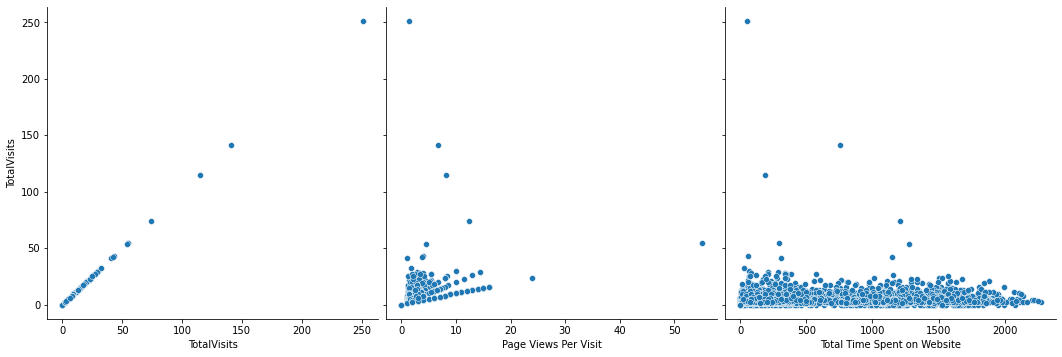

In [55]:
# Visualising the data of all the numerical columns 

sns.pairplot(ls,x_vars=["TotalVisits",'Page Views Per Visit','Total Time Spent on Website'], y_vars="TotalVisits",size=5,diag_kind=None)
plt.show()

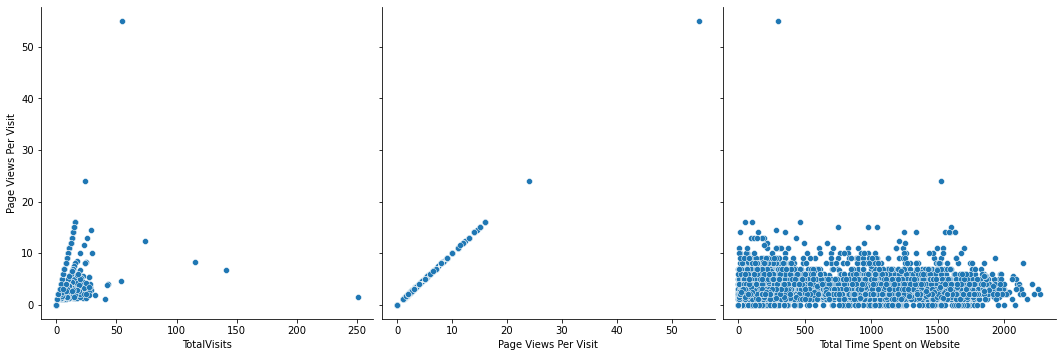

In [56]:
# Visualising the data of all the numerical columns

sns.pairplot(ls,x_vars=["TotalVisits",'Page Views Per Visit','Total Time Spent on Website'], y_vars="Page Views Per Visit",size=5,diag_kind=None)
plt.show()

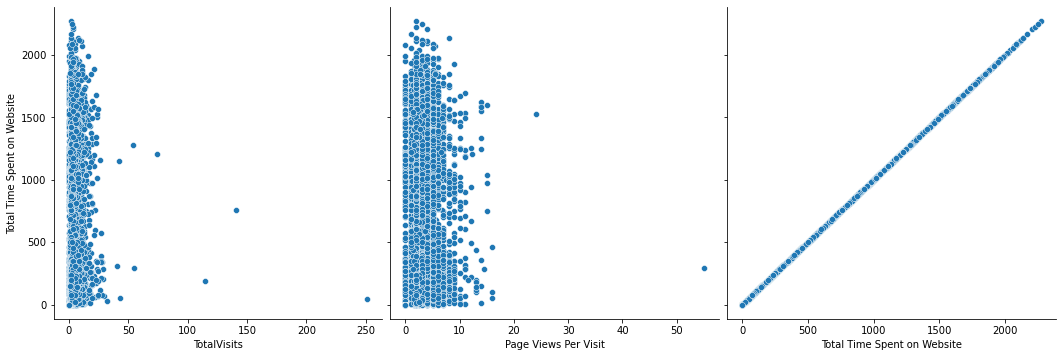

In [57]:
# Visualising the data of all the numerical columns 

sns.pairplot(ls,x_vars=["TotalVisits",'Page Views Per Visit','Total Time Spent on Website'], y_vars="Total Time Spent on Website",size=5,diag_kind=None)
plt.show()

**We see that no numerical columns are correlated with each other, this is a good sign**

In [58]:
ls.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                             101
Country                                     0
What is your current occupation             0
Search                                      0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [59]:
ls.shape

(9204, 21)

The Columns, **Last Activity & Last Notable Activity**, were the data that was collected by he initial sales teams, so this data would not be appropriate for the model building process. Hence dropping both *Last Activity & Last Notable Activity* columns 

In [60]:
ls=ls.drop(["Last Activity","Last Notable Activity"],axis=1)

In [61]:
#checking the sum of null values for entire dataset
ls.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Country                                   0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
dtype: int64

In [62]:
#checking the shape of the dataset  
ls.shape

(9204, 19)

## Now, since we have a number of binary variables having values YES/NO, we will convert them to 1/0 respectively

In [63]:
binary_cols = ls.nunique()[lambda x: x == 2].index
[binary_cols]

[Index(['Do Not Email', 'Do Not Call', 'Converted', 'Country', 'Search',
        'Newspaper Article', 'X Education Forums', 'Newspaper',
        'Digital Advertisement', 'Through Recommendations',
        'A free copy of Mastering The Interview'],
       dtype='object')]

In [64]:
# Inspecting all the columns
ls[['Do Not Email', 'Do Not Call', 'Converted', 'Country', 'Search',
        'Newspaper Article', 'X Education Forums', 'Newspaper',
        'Digital Advertisement', 'Through Recommendations',
        'A free copy of Mastering The Interview']].head()

,Do Not Email,Do Not Call,Converted,Country,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,No,No,0,Outside India,No,No,No,No,No,No,No
1,No,No,0,India,No,No,No,No,No,No,No
2,No,No,1,India,No,No,No,No,No,No,Yes
3,No,No,0,India,No,No,No,No,No,No,No
4,No,No,1,India,No,No,No,No,No,No,No


Except **converted and country** all the columns are binary **yes/No** columns.

# Converting the binary variables, yes/no to 1/0

In [65]:
#Creating a list of all such variables
varlist=['Do Not Email', 'Do Not Call','Search',
        'Newspaper Article', 'X Education Forums', 'Newspaper',
        'Digital Advertisement', 'Through Recommendations',
        'A free copy of Mastering The Interview']

# defining the map function
def bin_map(x):
    return x.map({"Yes":1,"No":0})

#applying the function to the varlist

ls[varlist]=ls[varlist].apply(bin_map)

In [66]:
#Checking all converted columns
ls[varlist].head()

,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


 All the **Yes/No** columns have been converted to **1/0**

In [67]:
#Manually converting value for column "Country" to 1/0
ls["Country"]=ls["Country"].replace({"India": 1 , "Outside India": 0 })
print(ls["Country"].value_counts(normalize=False))


1    6491
0    2713
Name: Country, dtype: int64


In [68]:
#checking the modified dataset
ls.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,0,Unemployed,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,1,Unemployed,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,1,Other Professions,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,1,Unemployed,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,1,Unemployed,0,0,0,0,0,0,0


Now, on inspecting the dataset we see all binary columns have been modified to 1/0

It is also seen that the columns **"Prospect ID","Lead Number"** have no relevance in predictive analysis since all their elements are unique in nature, hence we drop these.

In [69]:
#dropping the columns "Prospect ID","Lead Number"
ls=ls.drop(["Prospect ID","Lead Number"],axis=1)

In [70]:
#printing the number of unique values
print(ls.nunique(axis=0))

Lead Origin                                  4
Lead Source                                 20
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1730
Page Views Per Visit                       114
Country                                      2
What is your current occupation              4
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
dtype: int64


We observe that there are columns wit more than 2 unique values, they are of numerical and categorical type, hence inspecting these columns.

In [71]:
#extracting the columns for which the uniques values are more than 2
oth_cols = ls.nunique()[lambda x: x>2].index
oth_cols

Index(['Lead Origin', 'Lead Source', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation'],
      dtype='object')

In [72]:
#checking the head of all such columns
ls[oth_cols].head()

,Lead Origin,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0.0,0,0.0,Unemployed
1,API,Organic Search,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,2.0,1532,2.0,Other Professions
3,Landing Page Submission,Direct Traffic,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,2.0,1428,1.0,Unemployed


In [73]:
#printing the number of unique values for columns with more than two unique values
print(ls[oth_cols].nunique(axis=0))

Lead Origin                           4
Lead Source                          20
TotalVisits                          41
Total Time Spent on Website        1730
Page Views Per Visit                114
What is your current occupation       4
dtype: int64


In [74]:
# inspecting the null values
ls[oth_cols].isnull().sum()

Lead Origin                        0
Lead Source                        0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
What is your current occupation    0
dtype: int64

In [75]:
#printing the value counts for the remaining categorical columns
print(ls["Lead Origin"].value_counts(normalize=True))
print(ls["Lead Source"].value_counts(normalize=True))
print(ls["What is your current occupation"].value_counts(normalize=True))


Landing Page Submission    0.530748
API                        0.388961
Lead Add Form              0.074424
Lead Import                0.005867
Name: Lead Origin, dtype: float64
Google               0.312147
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
Pay per Click Ads    0.000109
WeLearn              0.000109
testone              0.000109
NC_EDM               0.000109
blog                 0.000109
welearnblog_Home     0.000109
Name: Lead Source, dtype: float64
Unemployed              0.604846
Unknown                 0.292264
Working Professional    0.076488
Other Professions       0.026402
Name: What is your current occupation, dtype: float64


## For categorical variables with multiple levels, we will now be creating dummy features 

In [76]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(ls[['Lead Origin', 'Lead Source',
       'What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe
ls = pd.concat([ls, dummy1], axis=1)

In [77]:
#checking the dummy variables.
ls.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0,0.0,0,0.0,0,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,1,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,1,Other Professions,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,1,Unemployed,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,1,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Since we have created dummies for the above variables, so we can drop them

In [78]:
# We have created dummies for the below variables, so we can drop them
ls= ls.drop(['Lead Origin', 'Lead Source',
       'What is your current occupation'], 1)

In [79]:
ls.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [80]:
#checking the shape of the modified dataset
ls.shape

(9204, 39)

In [81]:
#checking the datatypes of all the columns
ls.dtypes

Do Not Email                                              int64
Do Not Call                                               int64
Converted                                                 int64
TotalVisits                                             float64
Total Time Spent on Website                               int64
Page Views Per Visit                                    float64
Country                                                   int64
Search                                                    int64
Newspaper Article                                         int64
X Education Forums                                        int64
Newspaper                                                 int64
Digital Advertisement                                     int64
Through Recommendations                                   int64
A free copy of Mastering The Interview                    int64
Lead Origin_Landing Page Submission                       uint8
Lead Origin_Lead Add Form               

In [82]:
#checking the sum of null values for all columns
ls.isnull().sum()

Do Not Email                                            0
Do Not Call                                             0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
Country                                                 0
Search                                                  0
Newspaper Article                                       0
X Education Forums                                      0
Newspaper                                               0
Digital Advertisement                                   0
Through Recommendations                                 0
A free copy of Mastering The Interview                  0
Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
Lead Source_Di

***We have completed the basic data preperation and cleaning as we have created dummy variables, all the columns are in numerical format and all the null values have been removed***

## Outliers Analysis

In [83]:
# Checking for outliers in the continuous variables
num_ls = ls[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]


In [84]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_ls.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.000000,9204.000000,9204.000000
mean,3.407214,489.005541,2.336674
std,4.841571,547.980340,2.163709
min,0.000000,0.000000,0.000000
25%,1.000000,14.000000,1.000000
50%,3.000000,250.000000,2.000000
75%,5.000000,938.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1839.970000,9.000000


**On inspecting the values, we see that "TotalVisits" & "Page Views Per Visit" have outliers**

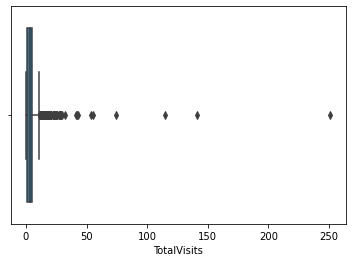

In [85]:
#TotalVisits using Boxplot
sns.boxplot(ls['TotalVisits'])
plt.show()

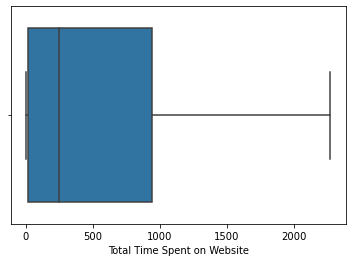

In [86]:
#'Total Time Spent on Website' using Boxplot
sns.boxplot(ls['Total Time Spent on Website'])
plt.show()

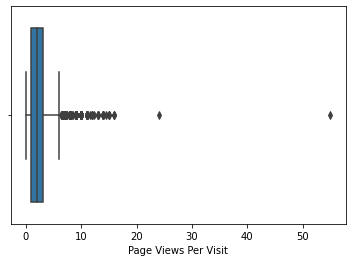

In [87]:
#'Page Views Per Visit' using boxplot

sns.boxplot(ls['Page Views Per Visit'])
plt.show()

## Analysing Correlation Using Heatmap 

In [88]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

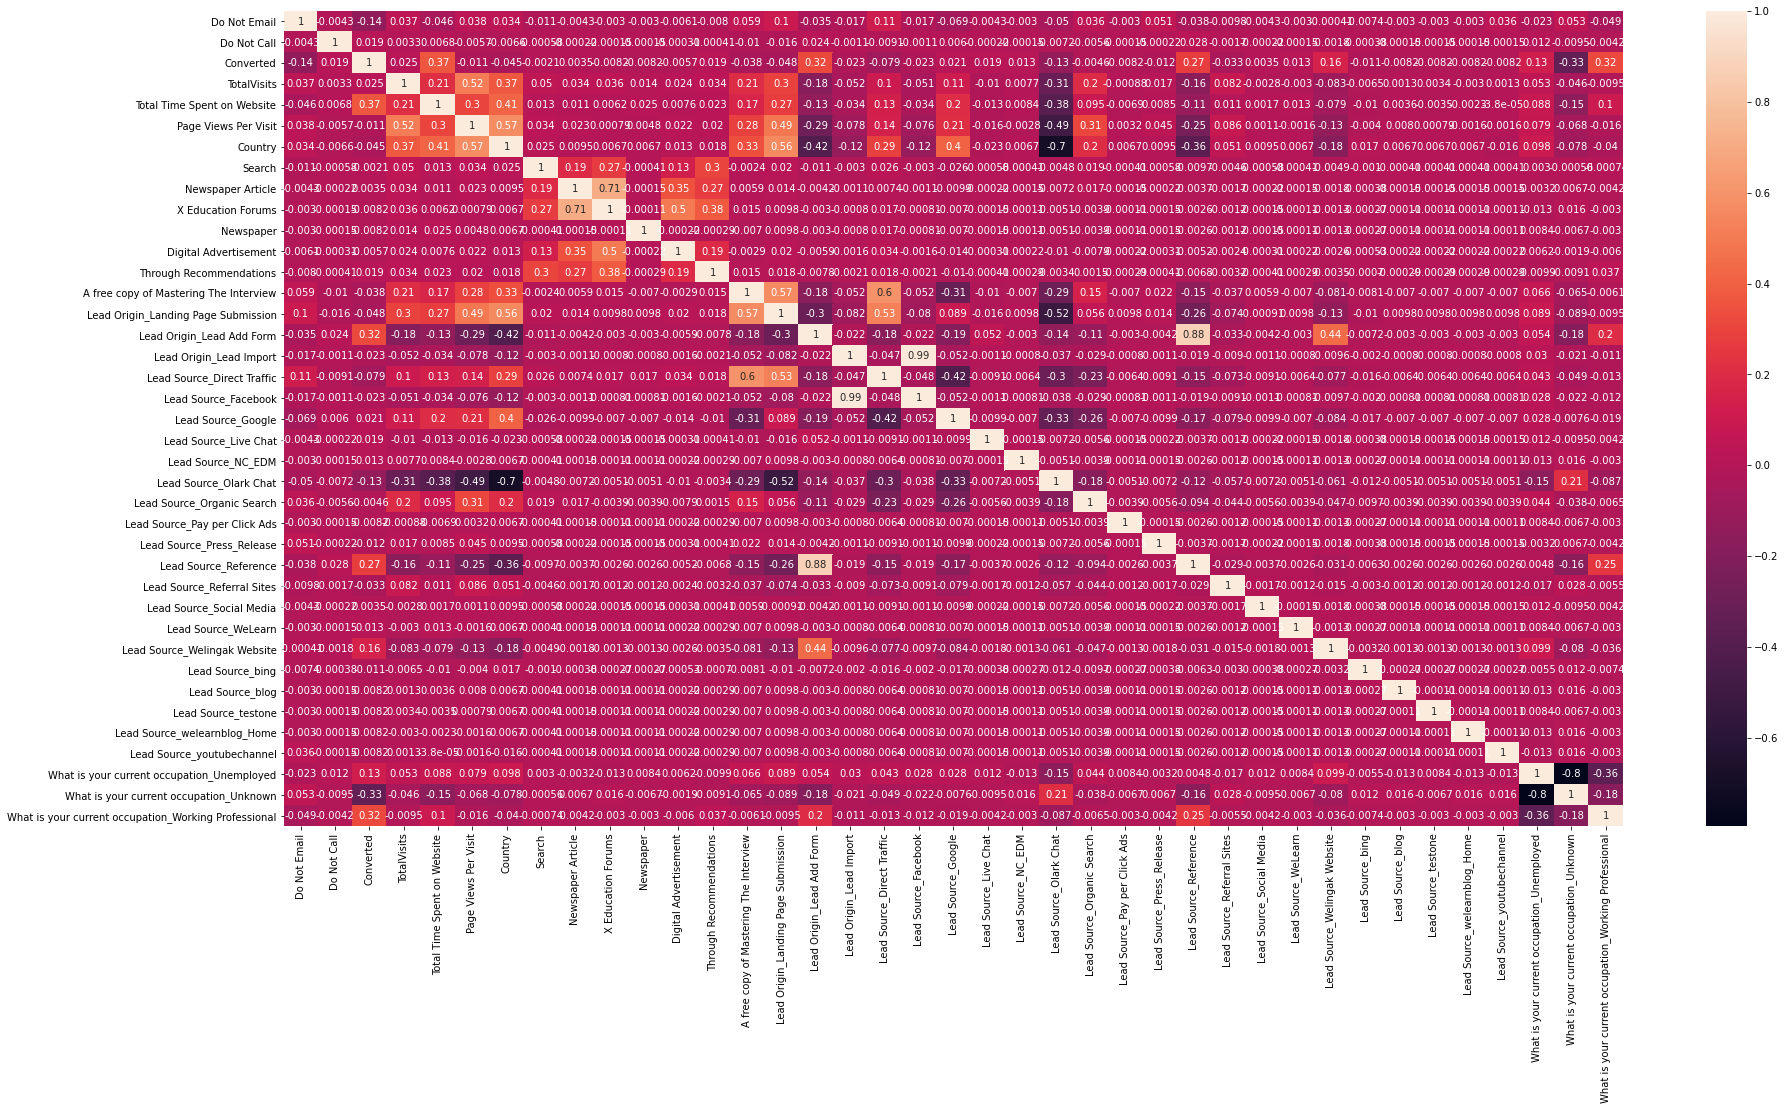

In [89]:
# Let's see the correlation matrix using the heatmap

plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(ls.corr(),annot = True)
plt.show()


**From the Heatmap "Lead Origin_Lead Import" and "Lead Source_Facebook" have a correlation of 0.99, so we drop them.**

In [90]:
ls=ls.drop(["Lead Origin_Lead Import","Lead Source_Facebook"],axis=1)

**NOW OUR DATA SET IS READY FOR MODEL BUILDING AND PREDICTIVE ANALYSIS**

## Step 4: Test-Train Split

In [91]:
# Importing train-test-split method from sklearn - model selection
from sklearn.model_selection import train_test_split

In [92]:
# Putting feature variable to X
X = ls.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [93]:
# Putting response variable to y
y = ls['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [94]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [95]:
# Importing Standard Scaler method from sklearn - preprocessing library
from sklearn.preprocessing import StandardScaler

Now, Scalling the **"TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"** variables with standard scaler and fitting - tranforming the X - train dataset


In [96]:
scaler = StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
5310,0,0,0.128736,-0.721902,0.735893,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2181,0,0,1.056122,-0.429014,2.533532,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8215,0,0,-0.798651,-0.905639,-1.061746,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8887,0,0,-0.334958,-0.487228,-0.162927,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7920,0,0,0.128736,-0.547261,0.735893,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Checking the conversion Rate

In [97]:
conversion = (sum(ls['Converted'])/len(ls['Converted'].index))*100
conversion

38.374619730551935

### We have conversion rate of almost 38%

In [98]:
ls.shape

(9204, 37)

## Running Your First Training Model

In [99]:
#Importing Scikit learn.
import statsmodels.api as sm          

In [100]:
# Logistic regression model and adding constant
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6406
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2879.1
Date:                Mon, 14 Jun 2021   Deviance:                       5758.2
Time:                        19:41:19   Pearson chi2:                 7.17e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6536      0.504     -1.298      0.194      -1.641       0.334
Do Not Email                                            -1.4114      0.163     -8.664      0.000      -1.731      -1.092
Do Not Call                                             20.8809   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
TotalVisits                                              0.1176      0.036      3.228      0.001       0.046       0.189
Total Time Spent on Website                              1.1244      0.039     28.727      0.000       1.048       1.201
Page Views Per Visit                                    -0.0179      0.046     -0.386      0.699      -0.109       0.073
Country                                                 -0.0679      0.158     -0.431      0.667      -0.377       0.241
Search                                                  -0.2256      0.808     -0.279      0.780      -1.809       1.358
Newspaper Article                                       22.1421   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
X Education Forums                                     -44.1480   6.82e+04     -0.001      0.999   -1.34e+05    1.34e+05
Newspaper                                              -24.5559   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                                   -0.0602      1.650     -0.036      0.971      -3.295       3.175
Through Recommendations                                  0.9375      1.530      0.613      0.540      -2.060       3.935
A free copy of Mastering The Interview                  -0.0265      0.101     -0.263      0.792      -0.224       0.171
Lead Origin_Landing Page Submission                     -0.0400      0.099     -0.404      0.686      -0.234       0.154
Lead Origin_Lead Add Form                                2.2568      1.210      1.865      0.062      -0.114       4.628
Lead Source_Direct Traffic                              -0.0535      0.501     -0.107      0.915      -1.036       0.929
Lead Source_Google                                       0.3015      0.498      0.605      0.545      -0.675       1.278
Lead Source_Live Chat                                   22.1104   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_NC_EDM                                      23.8070   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.1782      0.475      2.479      0.013       0.247       2.110
Lead Source_Organic Search                               0.1043      0.504      0.207      0.836      -0.883       1.091
Lead Source_Pay per Click Ads                          -20

## Feature Selection Using RFE

In [101]:
#importing the neccessary libraries
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [102]:
#importing libraries
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [103]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False,  True,
        True,  True, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False,  True,  True])

Now, we check features selected by RFE

In [104]:
# Check features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Country', False, 16),
 ('Search', False, 13),
 ('Newspaper Article', False, 8),
 ('X Education Forums', False, 7),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 12),
 ('Through Recommendations', False, 5),
 ('A free copy of Mastering The Interview', False, 22),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Live Chat', True, 1),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Pay per Click Ads', False, 6),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 17),
 ('Lead Source_WeLearn

In [105]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]

In [106]:
#checking the dataset with RFE which are insignificant
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Country',
       'Search', 'Newspaper Article', 'X Education Forums',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel',
       'What is your current occupation_Unemployed'],
      dtype='object')

### Assessing the model with StatsModels

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2888.3
Date:                Mon, 14 Jun 2021   Deviance:                       5776.5
Time:                        19:42:49   Pearson chi2:                 7.18e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5329      0.052    -10.247      0.000      -0.635      -0.431
Do Not Email                                            -1.3998      0.161     -8.689      0.000      -1.716      -1.084
Total Time Spent on Website                              1.1299      0.039     29.067      0.000       1.054       1.206
Newspaper                                              -23.4027   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Lead Origin_Lead Add Form                                2.1760      1.182      1.840      0.066      -0.141       4.493
Lead Source_Direct Traffic                              -0.3317      0.079     -4.205      0.000      -0.486      -0.177
Lead Source_Live Chat                                   20.9462   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Lead Source_NC_EDM                                      22.6203   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Olark Chat                                   0.9368      0.099      9.478      0.000       0.743       1.131
Lead Source_Reference                                    1.2278      1.198      1.025      0.305      -1.120       3.576
Lead Source_Referral Sites                              -0.2874      0.304     -0.945      0.344      -0.883       0.308
Lead Source_Welingak Website                             4.1085      1.554      2.644      0.008       1.063       7.155
What is your current occupation_Unknown                 -1.4117      0.083    -16.934      0.000      -1.575      -1.248
What is your current occupation_Working Professional     2.3903      0.174     13.772      0.000       2.050       2.730
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.

In [108]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  

,Features,VIF
4,Lead Origin_Lead Add Form,90.72
9,Lead Source_Reference,72.96
11,Lead Source_Welingak Website,20.88
0,const,2.93
6,Lead Source_Live Chat,1.40
8,Lead Source_Olark Chat,1.39
2,Total Time Spent on Website,1.26
5,Lead Source_Direct Traffic,1.18
12,What is your current occupation_Unknown,1.12
13,What is your current occupation_Working Profes...,1.11


"Lead Source_Live Chat" has a high p-value and VIF value, hence dropping the column.

In [109]:
# Creating a dataset, without ""Lead Source_Live Chat""
X_train_2 = X_train_sm.drop(["Lead Source_Live Chat"], axis = 1)

Now, we repeat the above procedure after removing columns.

In [110]:
X_train_2=sm.add_constant(X_train_2)                                # Adding constant
logis2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())    # Using GLM, creating model
reg2=logis2.fit()                                                   # Fitting our model
reg2.summary()                                                      # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6429
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.15024
Method:                          IRLS   Log-Likelihood:                -3028.9
Date:                Mon, 14 Jun 2021   Deviance:                       965.91
Time:                        19:44:11   Pearson chi2:                     966.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3927      0.008     47.474      0.000       0.376       0.409
Do Not Email                                            -0.1585      0.018     -8.761      0.000      -0.194      -0.123
Total Time Spent on Website                              0.1974      0.005     36.406      0.000       0.187       0.208
Newspaper                                               -0.8098      0.388     -2.088      0.037      -1.570      -0.049
Lead Origin_Lead Add Form                                0.5194      0.147      3.540      0.000       0.232       0.807
Lead Source_Direct Traffic                              -0.0548      0.012     -4.664      0.000      -0.078      -0.032
Lead Source_NC_EDM                                       0.6700      0.388      1.728      0.084      -0.090       1.430
Lead Source_Olark Chat                                   0.1354      0.015      9.240      0.000       0.107       0.164
Lead Source_Reference                                   -0.0172      0.148     -0.116      0.907      -0.307       0.273
Lead Source_Referral Sites                              -0.0469      0.043     -1.093      0.274      -0.131       0.037
Lead Source_Welingak Website                             0.2193      0.152      1.448      0.148      -0.078       0.516
What is your current occupation_Unknown                 -0.2182      0.011    -19.397      0.000      -0.240      -0.196
What is your current occupation_Working Professional     0.3336      0.019     17.679      0.000       0.297       0.371
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.

Since **Lead Source_Reference** has the highest p value we remove it.

In [111]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  

,Features,VIF
4,Lead Origin_Lead Add Form,64.87
8,Lead Source_Reference,52.40
10,Lead Source_Welingak Website,15.19
0,const,2.93
7,Lead Source_Olark Chat,1.39
2,Total Time Spent on Website,1.26
5,Lead Source_Direct Traffic,1.18
11,What is your current occupation_Unknown,1.12
12,What is your current occupation_Working Profes...,1.11
1,Do Not Email,1.02


In [112]:
# Creating a dataset, without "Lead Source_Reference"
X_train_3 = X_train_2.drop(["Lead Source_Reference"], axis = 1)

In [113]:
X_train_3=sm.add_constant(X_train_3)                                # Adding constant
logis3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())    # Using GLM, creating model
reg3=logis3.fit()                                                   # Fitting our model
reg3.summary()                                                      # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6430
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.15022
Method:                          IRLS   Log-Likelihood:                -3028.9
Date:                Mon, 14 Jun 2021   Deviance:                       965.91
Time:                        19:44:50   Pearson chi2:                     966.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3927      0.008     47.478      0.000       0.376       0.409
Do Not Email                                            -0.1585      0.018     -8.762      0.000      -0.194      -0.123
Total Time Spent on Website                              0.1974      0.005     36.412      0.000       0.187       0.208
Newspaper                                               -0.8098      0.388     -2.088      0.037      -1.570      -0.050
Lead Origin_Lead Add Form                                0.5026      0.022     22.660      0.000       0.459       0.546
Lead Source_Direct Traffic                              -0.0548      0.012     -4.663      0.000      -0.078      -0.032
Lead Source_NC_EDM                                       0.6700      0.388      1.728      0.084      -0.090       1.430
Lead Source_Olark Chat                                   0.1354      0.015      9.243      0.000       0.107       0.164
Lead Source_Referral Sites                              -0.0469      0.043     -1.093      0.274      -0.131       0.037
Lead Source_Welingak Website                             0.2362      0.044      5.394      0.000       0.150       0.322
What is your current occupation_Unknown                 -0.2182      0.011    -19.400      0.000      -0.240      -0.196
What is your current occupation_Working Professional     0.3335      0.019     17.694      0.000       0.297       0.370
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.

Since **Lead Source_Referral Sites** has the highest p value we remove it.

In [114]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  

,Features,VIF
0,const,2.93
4,Lead Origin_Lead Add Form,1.48
7,Lead Source_Olark Chat,1.39
9,Lead Source_Welingak Website,1.27
2,Total Time Spent on Website,1.26
5,Lead Source_Direct Traffic,1.18
10,What is your current occupation_Unknown,1.12
11,What is your current occupation_Working Profes...,1.11
1,Do Not Email,1.02
8,Lead Source_Referral Sites,1.02


In [116]:
# Creating a dataset, without "Lead Source_Referral Sites"
X_train_4 = X_train_3.drop(["Lead Source_Referral Sites"], axis = 1)

In [117]:
X_train_4=sm.add_constant(X_train_4)                                # Adding constant
logis4=sm.GLM(y_train,X_train_4,families=sm.families.Binomial())    # Using GLM, creating model
reg4=logis4.fit()                                                   # Fitting our model
reg4.summary()                                                      # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6431
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.15022
Method:                          IRLS   Log-Likelihood:                -3029.5
Date:                Mon, 14 Jun 2021   Deviance:                       966.09
Time:                        19:45:44   Pearson chi2:                     966.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3914      0.008     47.816      0.000       0.375       0.407
Do Not Email                                            -0.1584      0.018     -8.754      0.000      -0.194      -0.123
Total Time Spent on Website                              0.1975      0.005     36.442      0.000       0.187       0.208
Newspaper                                               -0.8101      0.388     -2.089      0.037      -1.570      -0.050
Lead Origin_Lead Add Form                                0.5039      0.022     22.754      0.000       0.461       0.547
Lead Source_Direct Traffic                              -0.0535      0.012     -4.575      0.000      -0.076      -0.031
Lead Source_NC_EDM                                       0.6714      0.388      1.732      0.083      -0.089       1.431
Lead Source_Olark Chat                                   0.1369      0.015      9.388      0.000       0.108       0.165
Lead Source_Welingak Website                             0.2362      0.044      5.395      0.000       0.150       0.322
What is your current occupation_Unknown                 -0.2184      0.011    -19.425      0.000      -0.240      -0.196
What is your current occupation_Working Professional     0.3335      0.019     17.694      0.000       0.297       0.370
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.

Since **Lead Source_NC_EDM** has the highest p value we remove it.

In [118]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  

,Features,VIF
0,const,2.87
4,Lead Origin_Lead Add Form,1.48
7,Lead Source_Olark Chat,1.38
8,Lead Source_Welingak Website,1.27
2,Total Time Spent on Website,1.26
5,Lead Source_Direct Traffic,1.17
9,What is your current occupation_Unknown,1.12
10,What is your current occupation_Working Profes...,1.11
1,Do Not Email,1.02
3,Newspaper,1.00


In [119]:
# Creating a dataset, without "Lead Source_NC_EDM"
X_train_5 = X_train_4.drop(["Lead Source_NC_EDM"], axis = 1)

In [120]:
X_train_5=sm.add_constant(X_train_5)                                # Adding constant
logis5=sm.GLM(y_train,X_train_5,families=sm.families.Binomial())    # Using GLM, creating model
reg5=logis5.fit()                                                   # Fitting our model
reg5.summary()                                                      # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6432
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.15027
Method:                          IRLS   Log-Likelihood:                -3031.0
Date:                Mon, 14 Jun 2021   Deviance:                       966.54
Time:                        19:46:21   Pearson chi2:                     967.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3915      0.008     47.822      0.000       0.375       0.408
Do Not Email                                            -0.1585      0.018     -8.760      0.000      -0.194      -0.123
Total Time Spent on Website                              0.1976      0.005     36.454      0.000       0.187       0.208
Newspaper                                               -0.8102      0.388     -2.088      0.037      -1.571      -0.050
Lead Origin_Lead Add Form                                0.5039      0.022     22.749      0.000       0.460       0.547
Lead Source_Direct Traffic                              -0.0537      0.012     -4.592      0.000      -0.077      -0.031
Lead Source_Olark Chat                                   0.1367      0.015      9.372      0.000       0.108       0.165
Lead Source_Welingak Website                             0.2362      0.044      5.394      0.000       0.150       0.322
What is your current occupation_Unknown                 -0.2180      0.011    -19.389      0.000      -0.240      -0.196
What is your current occupation_Working Professional     0.3335      0.019     17.689      0.000       0.297       0.370
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.

Since **Lead Source_Referral Sites	** has the highest p value we remove it.

In [121]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  

,Features,VIF
0,const,2.87
4,Lead Origin_Lead Add Form,1.48
6,Lead Source_Olark Chat,1.38
7,Lead Source_Welingak Website,1.27
2,Total Time Spent on Website,1.26
5,Lead Source_Direct Traffic,1.17
8,What is your current occupation_Unknown,1.12
9,What is your current occupation_Working Profes...,1.11
1,Do Not Email,1.02
3,Newspaper,1.00


In [122]:
# Getting the predicted values on the train set
y_train_pred=reg5.predict(X_train_5)
y_train_pred.head()

5310    0.195158
2181    0.306708
8215    0.131190
8887    0.023509
7920    0.011646
dtype: float64

In [123]:
# Reshaping the values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19515772, 0.30670841, 0.13119023, 0.02350926, 0.01164642,
       0.83503902, 0.51545421, 0.81958139, 0.34921159, 0.89866694])

### Creating a dataframe with the actual Conversion and the predicted probabilities

In [124]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
5310,0,0,0.128736,-0.721902,0.735893,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2181,0,0,1.056122,-0.429014,2.533532,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8215,0,0,-0.798651,-0.905639,-1.061746,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8887,0,0,-0.334958,-0.487228,-0.162927,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7920,0,0,0.128736,-0.547261,0.735893,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [125]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conv_Prob,CustID
0,0,0.195158,5310
1,0,0.306708,2181
2,0,0.131190,8215
3,0,0.023509,8887
4,0,0.011646,7920


##### Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

In [126]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion,Conv_Prob,CustID,predicted
0,0,0.195158,5310,0
1,0,0.306708,2181,0
2,0,0.131190,8215,0
3,0,0.023509,8887,0
4,0,0.011646,7920,0


In [127]:
# importing scikit learn
from sklearn import metrics

In [128]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3474  426]
 [ 873 1669]]


In [129]:
# Predicted    not_conv    conv       
# Actual                                  
# not_conv       3473      427           
# conv           771       1771              

In [130]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.7983545482769326


## Metrics beyond simply accuracy

In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6565696302124312

In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.8907692307692308

In [134]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10923076923076923


In [135]:
# positive predictive value 
print (TP / float(TP+FP))

0.7966587112171838


In [136]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7991718426501035


## Plotting the ROC Curve


A ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [137]:
# Plotting the ROC curve using the necessary functions and labels
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [138]:
# Calling the ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conv_Prob, drop_intermediate = False )

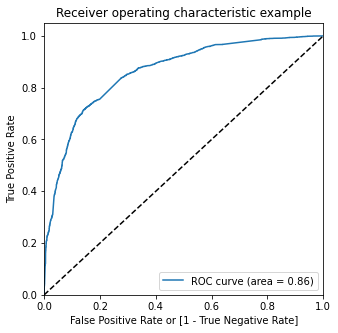

In [139]:
# Plotting the ROC curve
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conv_Prob)

Points to be concluded from above roc curve -
- The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
- The area under the curve is 86% of the total area.

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [140]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion,Conv_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.195158,5310,0,1,1,0,0,0,0,0,0,0,0
1,0,0.306708,2181,0,1,1,1,1,0,0,0,0,0,0
2,0,0.131190,8215,0,1,1,0,0,0,0,0,0,0,0
3,0,0.023509,8887,0,1,0,0,0,0,0,0,0,0,0
4,0,0.011646,7920,0,1,0,0,0,0,0,0,0,0,0


In [141]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.434182  0.997640  0.066923
0.1   0.1  0.515057  0.988985  0.206154
0.2   0.2  0.641105  0.946892  0.441795
0.3   0.3  0.746507  0.875295  0.662564
0.4   0.4  0.797578  0.726987  0.843590
0.5   0.5  0.798355  0.656570  0.890769
0.6   0.6  0.770568  0.527931  0.928718
0.7   0.7  0.737038  0.393391  0.961026
0.8   0.8  0.688916  0.228954  0.988718
0.9   0.9  0.669668  0.171125  0.994615


Now, after creating series of points let's check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding **'Accuracy'**, **'Sensitivity'** and **'Specificity'** for each points. These three methods will tell us how our model is - whether it is having low accuray or high or number of relevance data points is high or low etc.

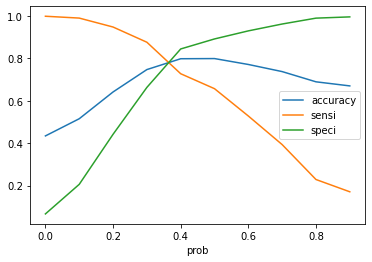

In [142]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.¶

In [169]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset

y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Conversion,Conv_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.195158,5310,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.306708,2181,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.131190,8215,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.023509,8887,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.011646,7920,0,1,0,0,0,0,0,0,0,0,0,0


In [170]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.7465072958708475

In [171]:
# MAking the new confusion matrix with new cut-off point
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted )
confusion2

array([[2584, 1316],
       [ 317, 2225]], dtype=int64)

In [172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8752950432730133

In [174]:
# Let us calculate specificity
TN / float(TN+FP)

0.6625641025641026

In [175]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.3374358974358974


In [176]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6283535724371646


In [177]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8907273354015857


## Precision and Recall

In [178]:
#Looking at the confusion matrix again

In [179]:
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
confusion

array([[3474,  426],
       [ 873, 1669]], dtype=int64)

##### Precision
TP / TP + FP

In [180]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7966587112171838

##### Recall
TP / TP + FN

In [181]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6565696302124312

Using sklearn utilities for the same

In [182]:
from sklearn.metrics import precision_score, recall_score

In [183]:
?precision_score

In [184]:
precision_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.7966587112171838

In [185]:
recall_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.6565696302124312

### Conclusions on precision and recall.

Important point to be noted from the outcomes for precision and recall score -
- Our precison percentage is 79.6% approximately and recall  percentage is 65.6%
- This means that there is a 70.6%chance that a predicted converted is actually a converted, and hence we have very good model which explains relevancy of true relevant results about .

**As per our business objective, it is better to go ahead and consider precision value than the recall percentage. Which I beleive will be more valuable in this scenario.**

### Precision and recall tradeoff

In [186]:
from sklearn.metrics import precision_recall_curve

In [187]:
y_train_pred_final.Conversion, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6437    1
 6438    1
 6439    1
 6440    0
 6441    0
 Name: Conversion, Length: 6442, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6437    1
 6438    1
 6439    1
 6440    1
 6441    1
 Name: predicted, Length: 6442, dtype: int64)

In [188]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conversion, y_train_pred_final.Conv_Prob)

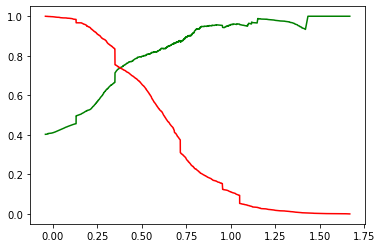

In [189]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [190]:
# Scaling and Transforming the test Set.
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [191]:
# Shape of the test set
X_test.shape

(2762, 36)

In [192]:
# Assigning the columns to the test set.
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Newspaper,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Unknown,What is your current occupation_Working Professional
2400,0,0.846232,0,0,0,0,0,0,0,0,0,0,0
849,0,-0.781935,0,0,0,0,0,0,0,0,0,1,0
7459,0,-0.663688,0,0,1,0,0,0,0,0,0,0,0
6184,1,0.060346,0,0,0,0,0,0,0,0,0,0,0
4869,0,1.497498,0,0,1,0,0,0,0,0,0,0,1


In [193]:
X_test_sm = sm.add_constant(X_test)

In [194]:
X_test_sm=X_test_sm.drop(["Lead Source_NC_EDM","Lead Source_Referral Sites","Lead Source_Reference","Lead Source_Live Chat"] , axis = 1)

Making predictions on the test set

In [195]:
y_test_pred = reg5.predict(X_test_sm)

In [196]:
y_test_pred[:10]

2400    0.558704
849     0.018948
7459    0.206661
6184    0.244923
4869    0.967216
2519    0.693397
5419    0.275793
2103    0.550436
3987    0.131190
3512    0.349212
dtype: float64

In [197]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [198]:
# Let's see the head
y_pred_1.head()

,0
2400,0.558704
849,0.018948
7459,0.206661
6184,0.244923
4869,0.967216


In [199]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [200]:

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [201]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [202]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [203]:
y_pred_final.head()

,Converted,CustID,0
0,1,2400,0.558704
1,0,849,0.018948
2,0,7459,0.206661
3,1,6184,0.244923
4,1,4869,0.967216


In [204]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [205]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,CustID,Conv_Prob
0,1,2400,0.558704
1,0,849,0.018948
2,0,7459,0.206661
3,1,6184,0.244923
4,1,4869,0.967216


In [206]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,CustID,Conv_Prob,final_predicted
0,1,2400,0.558704,1
1,0,849,0.018948,0
2,0,7459,0.206661,0
3,1,6184,0.244923,0
4,1,4869,0.967216,1


In [207]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7396813902968863

In [208]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1179,  593],
       [ 126,  864]], dtype=int64)

In [209]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [210]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8727272727272727

In [211]:
# Let us calculate specificity
TN / float(TN+FP)

0.6653498871331829

In [212]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
y_pred_final['Lead_Score'] = y_pred_final['Conv_Prob'].apply(lambda x : round(x*100))
y_pred_final.head()

,Converted,CustID,Conv_Prob,final_predicted,Lead_Score
0,1,2400,0.558704,1,56
1,0,849,0.018948,0,2
2,0,7459,0.206661,0,21
3,1,6184,0.244923,0,24
4,1,4869,0.967216,1,97


In [ ]:
ead Add Form,

# Conclusion

**Train set data**

- Accuracy   =74.65%
- Sensitivity=87.52% 
- Specificity=66.25

**Test Set Data**

- Accuracy   =73.96%
- Sensitivity=87.27% 
- Specificity=66.53%


### Inference
 - The CEO expected a conversion rate of 80%, we see that our sensitivity, which is the conversion rate is 87%, so, its a very good model
 - The Accuracy, Precision and Sensitiviy for both train and test set are within range.
 - In business terms, this model has the ability to adapt to the company’s needs of the future.
 - The most Important features for positive lead conversion are: 
    - **Lead Origin_Lead Add Form**
    - **What is your current occupation_Working Professional**
    - **Lead Source_Welingak Website**